# Исследовательский анализ объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings #убрать предупреждения 
warnings.simplefilter("ignore")

In [2]:
!pip show pandas 

Name: pandas
Version: 1.4.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\taras\anaconda3\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: datashader, holoviews, hvplot, seaborn, statsmodels, xarray


In [3]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/Users/Taras/Documents/я-практикум/data/data/real_estate_data.csv', sep='\t')


In [4]:
pd.set_option('display.max_columns', None)  #показать все столбцы таблицы


In [5]:
# изучим первые 15 строчек
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
#посмотрим информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
#Проверим на явные дубликаты
data.duplicated().sum() 

0

In [8]:
#оценим колличество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Не выполнено задание 1.3:   
<br>Постройте общую гистограмму для всех столбцов таблицы. Например, для датафрейма data это можно сделать командой data.hist(figsize=(15, 20)).
</div>

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

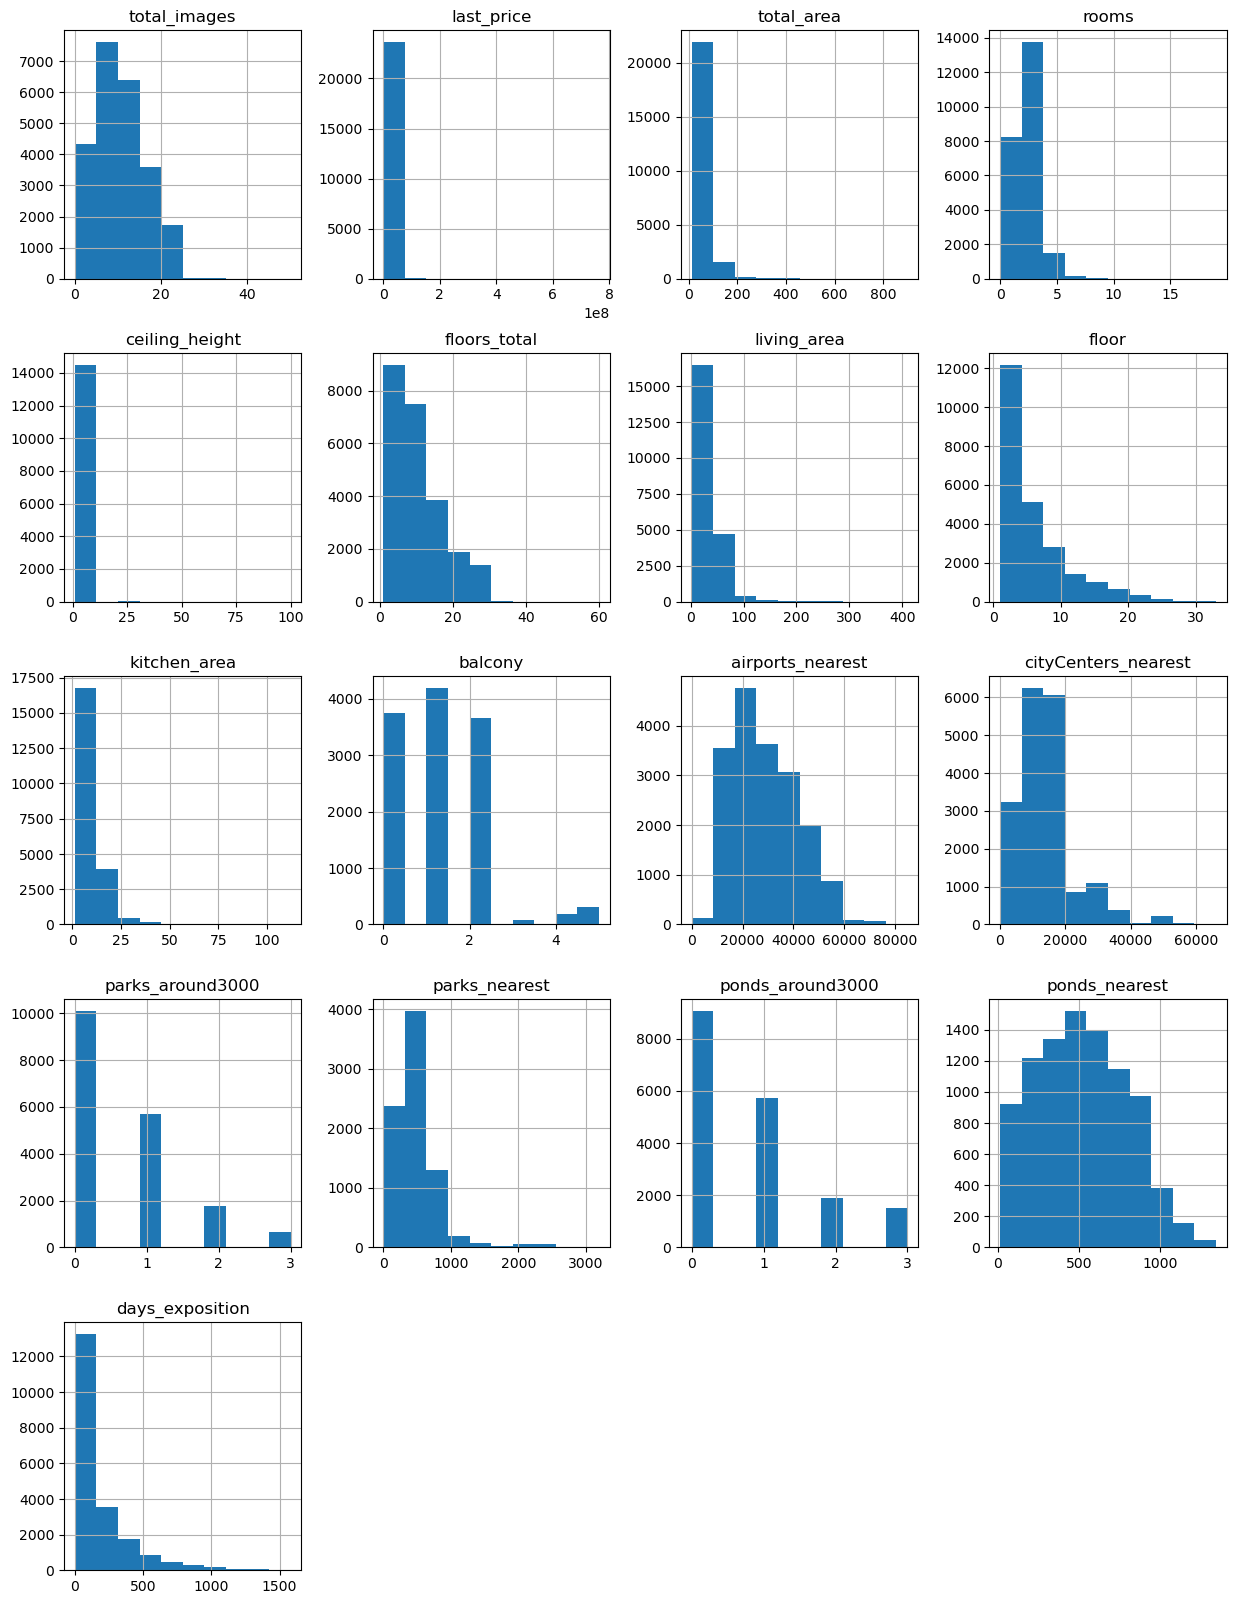

In [9]:
#Построим общую гистограмму для всех столбцов таблицы
data.hist(figsize=(15, 20))

**Вывод:**
- 23699 строк и 22 столбца  
- 13 столбцов содержат пропуски, необходимо проанализировать их - возможно ли заполнить пропуски. 
- Явных дубликатов нет, стоит подробнее изучить столбец locality_name и стандартизировать значения, если будет необходимо.
- Некорректый тип данных в столбцах floors_total, first_day_exposition, last_price, balcony


## Предобработка данных

**Рассмотрим пропуски и тип данных в каждом столбце и  внесем изменения там, где это необходимо**


Изменим тип столбца 'last_price' на int для дальнейшего анализа

In [10]:
data['last_price'] = data['last_price'].astype('int')


### Колличество комнат

Посмотрим уникальные значения в rooms.

In [11]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Посмотрим как изменяется площаль квартир, в зависимости от колличества комнат. 

<AxesSubplot:xlabel='rooms'>

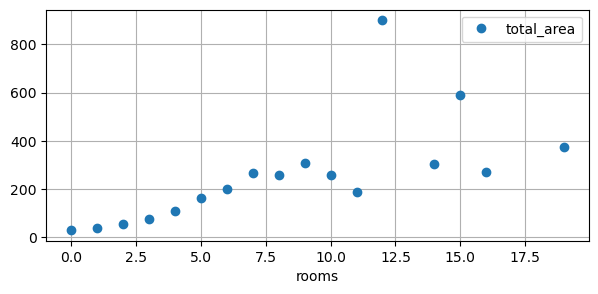

In [12]:
data.pivot_table(index='rooms',values='total_area',aggfunc='mean').plot( style='o', figsize=(7, 3), grid=True)

Зависимость между площадью и колличеством комнат четко прослеживается только до 12-комнатных квартир, а дальше какие-то рандомные выбросы. 
Оценим колличество квартир с колличеством комнат больше 12. 

In [13]:
big_flats = data[data['rooms'] > 12]
big_flats

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
866,5,25000000,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
14498,6,32250000,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,NaN,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
20829,6,28659000,245.4,2016-03-31T00:00:00,14,NaN,4.0,168.3,2,NaN,False,False,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


Таких квартир всего 5, значит их можно убрать из выборки. 

In [14]:
data=data[(data['rooms']<12)] 
len(data)  #проверяем размер выборки

23693

Посмотрим среднюю площадь квартир, где число комната равно 0. 

In [15]:
data[data['rooms'] == 0].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,197.000000,1.970000e+02,197.000000,197.0,82.000000,194.000000,183.000000,197.000000,0.0,126.000000,118.000000,118.000000,118.000000,29.000000,118.000000,69.000000,183.000000
mean,7.776650,3.337724e+06,29.279746,0.0,3.104268,16.896907,18.865246,8.578680,NaN,1.579365,24516.432203,13388.610169,0.296610,594.862069,0.822034,526.043478,109.180328
std,5.079055,5.046022e+06,25.855264,0.0,2.698948,6.925936,6.549527,6.290595,NaN,0.661552,12386.969865,5028.479861,0.559446,302.820164,0.873458,274.811509,158.847377
min,0.000000,9.457500e+05,15.500000,0.0,2.500000,3.000000,2.000000,1.000000,NaN,0.000000,6989.000000,1261.000000,0.000000,38.000000,0.000000,72.000000,3.000000
25%,4.000000,2.300000e+06,24.050000,0.0,2.700000,12.000000,16.000000,3.000000,NaN,1.000000,14567.000000,11618.000000,0.000000,396.000000,0.000000,348.000000,27.500000
50%,7.000000,2.700000e+06,26.050000,0.0,2.750000,17.000000,18.000000,7.000000,NaN,2.000000,21460.000000,13595.500000,0.000000,535.000000,1.000000,528.000000,50.000000
75%,11.000000,3.380000e+06,28.400000,0.0,2.800000,23.000000,19.950000,13.000000,NaN,2.000000,34004.750000,16383.750000,0.000000,761.000000,1.000000,674.000000,117.500000
max,21.000000,7.100000e+07,371.000000,0.0,27.000000,35.000000,68.000000,26.000000,NaN,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000


Площадь таких квартир маленькая, максимальная в такой выборке всего 21 метр. Там, где указана открытая планировка - оставим нулевые значения, а остальные заменим на 1, прировнях их к однушкам. 

In [16]:
#посчитаем сколько нулевых значений останется
print(len(data.loc[(data['rooms'] == 0) & (data['open_plan'] == True)]))

# присвоем 1, остальным
data.loc[(data['rooms'] == 0) & (data['open_plan'] == False)] = 1

59


### Этажи и высота потолков

Сначала посмотрим данные по колличеству этажей в доме. 

In [17]:
data['floors_total'].isna().sum()    

83

Удалим эти строки, так как их доля несущественна, а отсутствие данных будет мешать исследованию. 

In [18]:
data = data.dropna(subset=['floors_total']) 
data['floors_total'].isna().sum()    

0

In [19]:
data['floors_total'] = data['floors_total'].astype('int64')

Рассмотрим данные по высоте потолков.
Для начала запоним пропуски медианой, там где это возможно в соответствии с этажность домов.

In [20]:
data['ceiling_height'].isna().sum()    

9053

In [21]:
for h in data['floors_total'].unique(): 
    data.loc[(data['floors_total'] == h) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == h), 'ceiling_height'].median()
    
data['ceiling_height'].isna().sum()    

1

Теперь посмотрим значения. 

In [22]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [23]:
data['ceiling_height'].describe()

count    23609.000000
mean         2.724414
std          1.005568
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Согласно ГОСТ в этом регионе минимальная высота потолков должна быть 2,5 м. Это значение совпадает со значением первой квартили. 
Посчитаем колличество строк, где высота потолков ниже ГОСТ и их долю в датасете. Аналогичные действия сделаем для потолков высотой 2 м:

In [24]:
i = len(data.query('ceiling_height <= 2.5'))
print(i / 23699)

x = len(data.query('ceiling_height <= 2'))
print(x / 23699)

0.15777037005780833
0.007046710831680661


15% это слишком много. Будем отсеивать только строки, где высота меньше 2 метров. Вместе с ними удалим выброс равный 100м. 

In [25]:
data.query('ceiling_height <= 2').count()
data=data[(data['ceiling_height']>=2.5) & (data['ceiling_height']!=100 )]
data['ceiling_height'].sort_values().unique()

array([ 2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,
        2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,
        2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,
        2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,
        2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,
        2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,
        3.04,  3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,
        3.13,  3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,
        3.23,  3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,
        3.32,  3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,
        3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,
        3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,
        3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,  3.68,  3.69,  3.7 ,
        3.75,  3.76,  3.78,  3.8 ,  3.82,  3.83,  3.84,  3.85,  3.86,
        3.87,  3.88,

Двигаемся дальше. Встречаются значения больше 20 м. Если посмотреть на среднее значение выборки равное 2.65, то можно предположить что, такие большие значения появились из-за пропуска запятой при заполнении поля. 
Попробуем исправить ошибку. 

In [26]:
#Найдем список индексов строк, где высота потолков больше 20 метров и меньше 32. 
ceiling_height_index=data.query('32>=ceiling_height>=20').index

# по индексу обратимся к этим строкам и поделим текущее значение на 10
data.loc[ceiling_height_index,'ceiling_height'] = data.loc[ceiling_height_index,'ceiling_height']/10

# посмотрим, что получилось
data['ceiling_height'].sort_values().unique()

array([ 2.  ,  2.26,  2.4 ,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,
        2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,
        2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,
        2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,
        2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,
        2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,
        3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,
        3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,
        3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,
        3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,
        3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,
        3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,
        3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,
        3.68,  3.69,  3.7 ,  3.75,  3.76,  3.78,  3.8 ,  3.82,  3.83,
        3.84,  3.85,

### Общая площадь квартиры, жилая площадь, площадь кухни

В столбце total_area нет пропусков. Посмотрим значения. 

In [27]:
data['total_area'].describe()

count    23382.000000
mean        60.461380
std         34.950903
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        631.200000
Name: total_area, dtype: float64

Встречаются неправдаподобно маленькие значения. Рассмотрим их подробнее. 

In [28]:
data.query('total_area < 15')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17961,3,1400000,13.0,2017-12-03T00:00:00,1,2.60,9,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19546,3,1850000,13.0,2019-03-11T00:00:00,1,3.40,5,NaN,2,False,False,False,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19558,2,1686000,13.2,2018-12-17T00:00:00,1,2.55,5,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19642,5,1190000,14.0,2018-07-29T00:00:00,1,2.55,5,11.0,1,NaN,False,False,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
19807,0,3800000,13.0,2018-07-04T00:00:00,1,2.55,5,10.0,3,NaN,False,False,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19904,4,2400000,12.0,2017-07-19T00:00:00,1,2.55,5,10.0,2,NaN,False,False,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0


Предпологалось, что мы сможем удалить эти данные как артефакты, но судя по стоимости, колличеству комнат и тд они выглят правдоподобно. 

В таблице есть пропуски в living_area и в kitchen_area. Их можно заполнить средним значением по таблице, но высок риск получить значения, которые будут больше, чем площадь всей квартиры. 
По этому заполним их средним значением аналогичных по площади квартир. 


In [29]:
# перебираем каждое значение в total_area
for s in data['total_area'].unique():
    
    # на каждом шаге цикла ищем строки, в которых 
    # total_area (принятый за s) и есть пропуски в living_area
    # и записываем в них среднее значение living_area для каждого total_area
    
    data.loc[(data['total_area'] == s) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == s), 'living_area'].median()
    
data['living_area'].isna().sum()

133

In [30]:
# перебираем каждое значение в total_area
for s in data['total_area'].unique():
    
    # на каждом шаге цикла ищем строки, в которых 
    # total_area (принятый за s) и есть пропуски в kitchen_area
    # и записываем в них среднее значение kitchen_area для каждого total_area
    
    data.loc[(data['total_area'] == s) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area'] == s), 'kitchen_area'].median()
    
data['kitchen_area'].isna().sum()

151

In [31]:
#Удаляем отсатки, так как их число несущственно.


data = data.dropna(subset=['living_area']) 
print(data['living_area'].isna().sum())


data = data.dropna(subset=['kitchen_area']) 
data['kitchen_area'].isna().sum()

0


0

### Названия населённы пунктов

Пропуски в locality_name скорее всего ошибка при выгрузке или баг, так как в сервисе это обязательная информация. 
Удалим эти строки, чтобы при анализе не возникало путницы. 

In [32]:
data = data.dropna(subset=['locality_name']) 
data['locality_name'].isna().sum()

0

In [33]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

Пойдем простым и быстрым путем:
- Избавимся от ё, заменим на е
- Удалим типы населенных пунктов. Это не совсем верно, но поиск каждого корректного названия займет много времени. 
    

In [34]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

#Создадим список ненужных типов населенных пунктов которые хотим убрать
type_list = {'городской ' , 'коттеджный поселок ', 'городской поселок ', 'поселок городского типа ', 'городского типа ', 'поселок при железнодорожной станции ', 'поселок станции ' , 'садоводческое некоммерческое товарищество ' , 
    'садовое товарищество ', 'село ', 'поселок ', 'деревня ', 'при железнодорожной станции ' , 'имени ', 'коттеджный ',  'станции ' , 'при железнодорожной' }
#важно не забыть пробел в конце, чтобы убрать пробелы
data['locality_name'] = data['locality_name'].replace(type_list, '', regex=True)
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

### Аппартаменты

In [35]:
#Столбец is_apartment, вероятнее всего, является не обязательным полем в карточке, по этому много пропусков
#Предположим, что пользователи заполняя карточку аппартаментов отмечают это, а остальные просто пропускают.
#Заменим пропущенные значения на False, 

data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()


False    23045
True        48
Name: is_apartment, dtype: int64

### Балконы


Предположим, что если продавец не указал колличество балконов, то их нет в квартире. 
Заполним пустые значения '0'  и изменим тип данных на целое

In [36]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int64')

#Итого
data['balcony'].value_counts()

0    14869
1     4126
2     3544
5      296
4      180
3       78
Name: balcony, dtype: int64

### Дни публикации 

In [37]:
data['days_exposition'].isna().sum() / 23699 # доля в общей массе

0.13169332039326553

Доля достаточно весома. Это объявления о непроданных квартирах на момент выгрузки. 
Нам необходимо перевести days_exposition в int, но пустые строки нам мешают, посмотрим как их можно маркировать.

In [38]:
data['days_exposition'].describe()

count    19972.000000
mean       181.539856
std        220.048824
min          1.000000
25%         45.000000
50%         96.000000
75%        232.250000
max       1580.000000
Name: days_exposition, dtype: float64

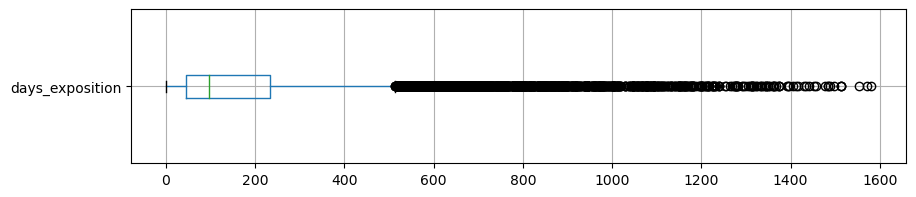

In [39]:
data.boxplot(column='days_exposition',vert=False,figsize=(10,2))
plt.show()

In [40]:
#заполним их 9999 как в примере на вебинаре
data['days_exposition'] = data['days_exposition'].fillna(9999)
data['days_exposition'] = data['days_exposition'].astype('int64')


### Картографические данные

К картографическим данным относятся расстояния до центра города, аэропорта и ближайшего парка\водоема.
Пропуски не будем трогать. 



In [41]:
data['last_price'].describe()

count    2.309300e+04
mean     6.486968e+06
std      1.031937e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

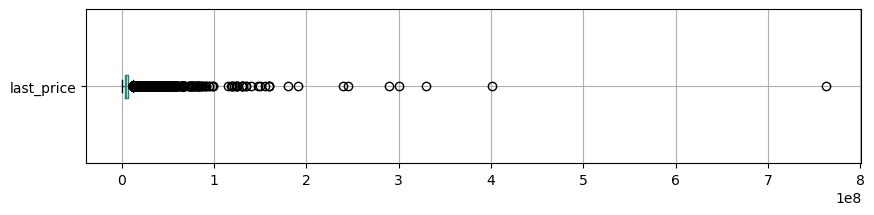

In [42]:
#действительно по цифрам не очень понятно, построим диаграмму размаха
data.boxplot(column='last_price',vert=False,figsize=(10,2))
plt.show()

Есть выбросы после 70 мл. Оценим, можно ли от них избавится. 

In [43]:
data[data['last_price']>70000000].sort_values(by='last_price') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7558,18,72000000,251.0,2016-02-19T00:00:00,3,2.75,4,169.00,3,False,False,False,30.50,0,Санкт-Петербург,24377.0,4471.0,3.0,570.0,0.0,NaN,500
11336,14,72375000,169.3,2015-06-18T00:00:00,4,3.00,8,95.40,4,False,False,False,22.50,0,Санкт-Петербург,26398.0,6737.0,3.0,251.0,2.0,599.0,571
14668,6,73884056,250.3,2018-03-25T00:00:00,3,3.08,12,101.54,12,False,False,False,31.73,0,Санкт-Петербург,31744.0,4836.0,0.0,NaN,3.0,153.0,215
20820,7,73900000,342.0,2015-06-18T00:00:00,5,3.00,4,187.00,2,False,False,False,10.00,0,Санкт-Петербург,25079.0,5544.0,0.0,NaN,1.0,251.0,377
19267,20,74000000,153.6,2019-04-29T00:00:00,3,3.30,8,56.00,6,False,False,False,50.00,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22831,18,289238400,187.5,2019-03-19T00:00:00,2,3.37,6,63.70,6,False,False,False,30.20,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,9999
15651,20,300000000,618.0,2017-12-18T00:00:00,7,3.40,7,258.00,5,False,False,False,70.00,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111
1436,19,330000000,190.0,2018-04-04T00:00:00,3,3.50,7,95.00,5,False,False,False,40.00,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233
14706,15,401300000,401.0,2016-02-20T00:00:00,5,2.55,9,204.00,9,False,False,False,24.00,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393


Удалим 66 строк. 

In [44]:
data=data[data['last_price'] < 70000000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23027 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23027 non-null  int64  
 1   last_price            23027 non-null  int32  
 2   total_area            23027 non-null  float64
 3   first_day_exposition  23027 non-null  object 
 4   rooms                 23027 non-null  int64  
 5   ceiling_height        23027 non-null  float64
 6   floors_total          23027 non-null  int64  
 7   living_area           23027 non-null  float64
 8   floor                 23027 non-null  int64  
 9   is_apartment          23027 non-null  bool   
 10  studio                23027 non-null  object 
 11  open_plan             23027 non-null  object 
 12  kitchen_area          23027 non-null  float64
 13  balcony               23027 non-null  int64  
 14  locality_name         23027 non-null  object 
 15  airports_nearest   

### Проверка итогов. 

Нам была дана база с 23699 стороками. Осталось 23093. 
Посчитаем какой процент строк мы удалили

In [45]:
((23699 - 23027)/23699) * 100

2.8355626819697033

Мы удалили 2,8% базы.  

## Добавление в таблицу новых столбцов

### Цена одного квадратного метра

In [46]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23693     73717.948718
23694     72490.845228
23695     52542.372881
23696     44091.710758
23698     41795.665635
Name: price_per_meter, Length: 23027, dtype: float64

### День недели, месяц, год публикации объявления

Сначала изменим тип столбца 'first_day_exposition' на   формат даты (время в исходной таблице не указано)

In [47]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%d")
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23693   2016-08-05
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23698   2017-07-21
Name: first_day_exposition, Length: 23027, dtype: datetime64[ns]

In [48]:

data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday


In [49]:
#Чтобы пользователя не вводил в заблуждение 0 = понедельник, заменим цифры на названия

data.loc[data['weekday_exposition'] == 0,'weekday_exposition']= 'пн'
data.loc[data['weekday_exposition'] == 1,'weekday_exposition']= 'вт'
data.loc[data['weekday_exposition'] == 2,'weekday_exposition']= 'ср'
data.loc[data['weekday_exposition'] == 3,'weekday_exposition']= 'чт'
data.loc[data['weekday_exposition'] == 4,'weekday_exposition']= 'пт'
data.loc[data['weekday_exposition'] == 5,'weekday_exposition']= 'сб'
data.loc[data['weekday_exposition'] == 6,'weekday_exposition']= 'вск'

data['weekday_exposition'].unique()

array(['чт', 'вт', 'пт', 'пн', 'ср', 'вск', 'сб'], dtype=object)

### Расстояние до центра города в километрах

In [50]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km']

0        16.028
1        18.603
2        13.933
3         6.800
4         8.098
          ...  
23693    34.104
23694     4.232
23695       NaN
23696       NaN
23698       NaN
Name: cityCenters_nearest_km, Length: 23027, dtype: float64

### Тип этажа квартиры

Присвоим категорию этажа «первый», «последний», «другой» с помощью функции

In [51]:
def floor_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
   

In [52]:
data['floor_cat'] = data.apply(floor_cat, axis = 1)
data['floor_cat']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23693    другой
23694    другой
23695    другой
23696    первый
23698    первый
Name: floor_cat, Length: 23027, dtype: object

## Исследовательский анализ данных

Изучите следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.
Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

### Общая площадь, жилая площадь, площадь кухни

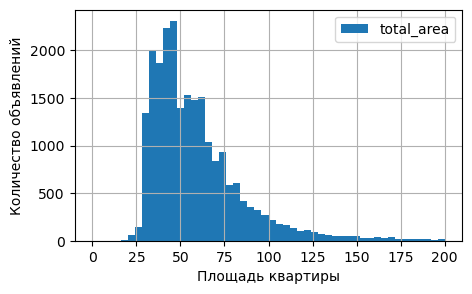

In [53]:
#Общая площадь
data.plot(kind = 'hist', y = 'total_area', bins = 50, grid=True, figsize = (5,3), range = (0,200))
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество объявлений')
plt.show()

In [54]:
data['total_area'].describe()

count    23027.000000
mean        59.624091
std         31.102370
min         14.000000
25%         40.195000
50%         52.000000
75%         69.500000
max        517.000000
Name: total_area, dtype: float64

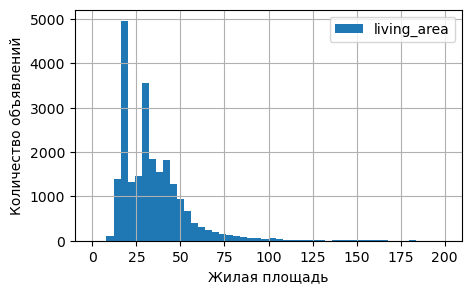

In [55]:
# Жилая площадь
data.plot(kind = 'hist', y = 'living_area', bins = 50, grid=True, figsize = (5,3), range = (0,200))
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений')
plt.show()


In [56]:
data['living_area'].describe()

count    23027.000000
mean        34.192967
std         20.110433
min          2.000000
25%         18.700000
50%         30.000000
75%         42.255000
max        332.000000
Name: living_area, dtype: float64

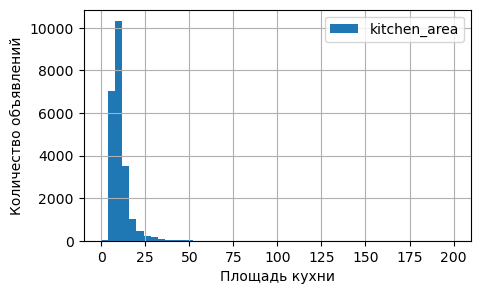

In [57]:
# Кухня
data.plot(kind = 'hist', y = 'kitchen_area', bins = 50, grid=True, figsize = (5,3), range = (0,200))
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений')
plt.show()


In [58]:
data['kitchen_area'].describe()

count    23027.000000
mean        10.373173
std          5.423867
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        100.700000
Name: kitchen_area, dtype: float64

Вывод:
По графику мы видим, что есть несколько выбросов - это связано с типовыми однушками, двушками и тд. 
Медианы приходится на: 
- площадь 52 метра, 
- жилая площадь 30,
- кухня 9 метров. 

что соответсвует среднестатистической двухкомнатной квартире. 

### Количество комнат

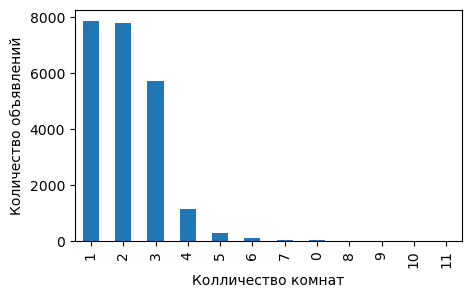

In [59]:
#data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, range = (0,10), figsize = (5,3))
#в этом случаее столбчатая диаграмма будет более наглядной 
data['rooms'].value_counts().plot( kind='bar', figsize = (5,3) )
plt.xlabel('Колличество комнат')
plt.ylabel('Количество объявлений')
plt.show()



In [60]:
data['rooms'].describe()

count    23027.000000
mean         2.073913
std          1.033618
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

**Вывод:**
По граффику видно, что однушки больше всего продается на рынке недвижимости в СПБ, им чуть уступают двушки. 

### Цена объекта

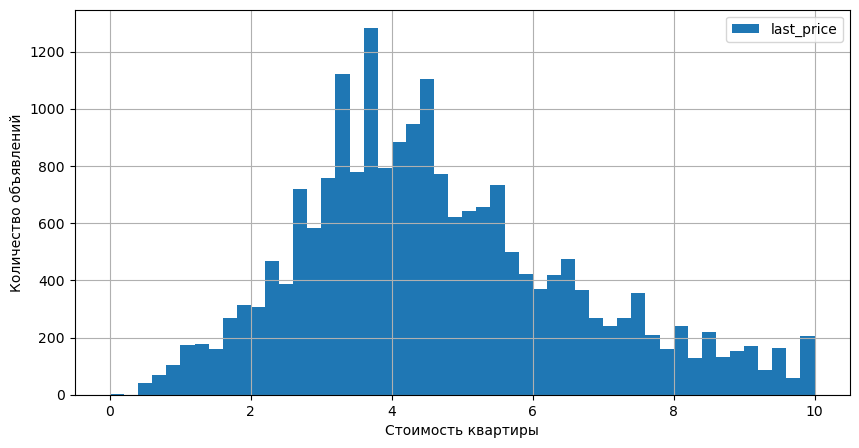

In [61]:
data['last_price']=data['last_price']/1000000
#data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, range = (0,20000000), figsize = (10,5))
data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (10,5), range = (0,10))
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество объявлений')
plt.show()




In [62]:
data['last_price'].describe()

count    23027.000000
mean         6.123307
std          5.553184
min          0.012190
25%          3.450000
50%          4.650000
75%          6.750000
max         68.500000
Name: last_price, dtype: float64

<br><b>Вывод:</b> Квартильный размах р в ценовом диапазоне от 3 до 6 миллионов рублей. Больше всего на рынке представленно квартир стоимостьтю 3 - 5 мл
</div>

### Высота потолков

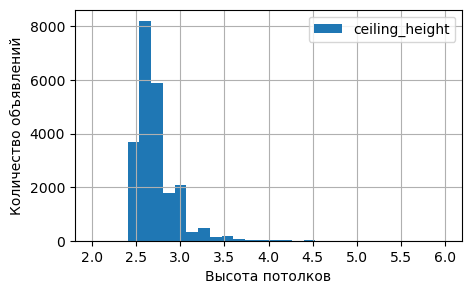

In [63]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,6), grid=True, figsize = (5,3))
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()



In [64]:
data['ceiling_height'].describe()

count    23027.000000
mean         2.707922
std          0.267521
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         14.850000
Name: ceiling_height, dtype: float64

**Вывод**
Среднее значение по СПБ - 2,7 м. Самые распространенная высота потолков - 2,5 и 2,7

### Этажи

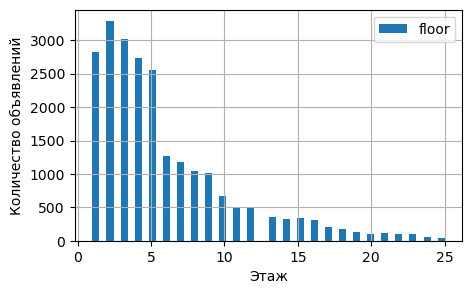

In [65]:
data.plot(y = 'floor', kind = 'hist', bins = 50, range = (1,25), grid=True, figsize = (5,3))
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()

In [66]:
data['floor'].describe()

count    23027.000000
mean         5.854345
std          4.850987
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

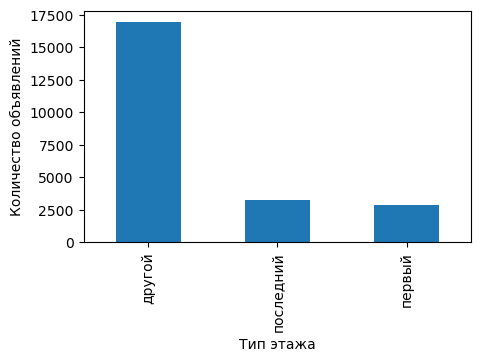

In [67]:
#в этом случаее столбчатая диаграмма будет более наглядной 
data['floor_cat'].value_counts().plot( kind='bar', figsize = (5,3) )
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')
plt.show();



In [68]:
data['floor_cat'].describe()

count      23027
unique         3
top       другой
freq       16942
Name: floor_cat, dtype: object

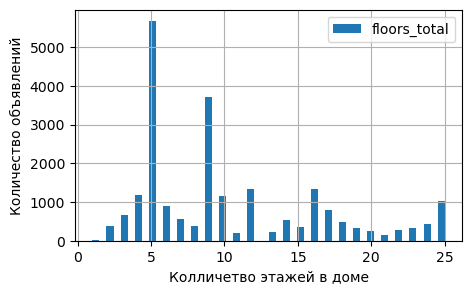

In [69]:
data.plot(y = 'floors_total', kind = 'hist', bins = 50, range = (1,25), grid=True, figsize = (5,3))
plt.xlabel('Колличетво этажей в доме')
plt.ylabel('Количество объявлений')
plt.show();



In [70]:
data['floors_total'].describe()

count    23027.000000
mean        10.627003
std          6.560032
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Вывод**: 
1. Мы видим несколько больших скачков - 5, 9, 12, 16, 25. Это наиболее распространенная этажность домов. 5 и 9 сюдя по колличеству - это скорее старый фонд. 
2. Больше всего квартир на рынке в пятиэтажных домах. 
3. Среднее значение 4 этаж.
4. Квартир на первом и последнем этажах, естественно меньше, чем остальных

### Инфраструктура

**Расстояние до центра**


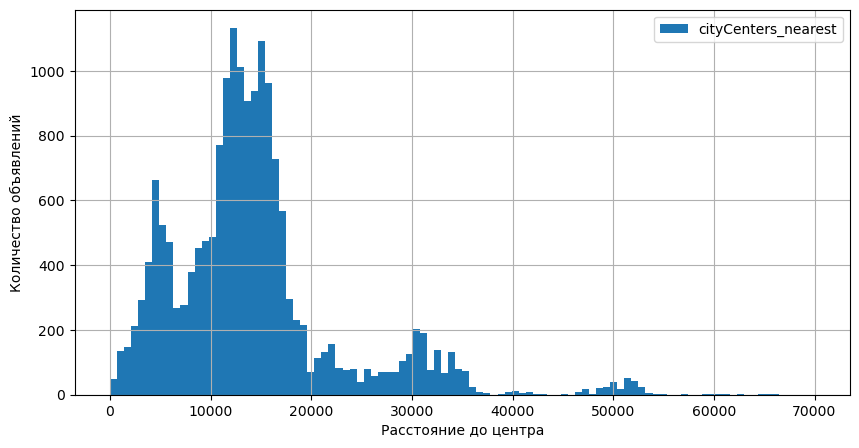

count    17704.000000
mean     14248.444419
std       8626.252723
min        181.000000
25%       9327.500000
50%      13138.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [71]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, range = (0,70000), grid=True, figsize = (10,5))
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество объявлений')
plt.show()

data['cityCenters_nearest'].describe()

**Вывод:** Медиана и стреднее 13-14 км. - это спальные районы на окраинах Питера. 
Остальные пики, это вероятнее всего крупные населенные пункты в ЛО, такие как Пушкин. 

**Расстояние до ближайшего аэропорта**

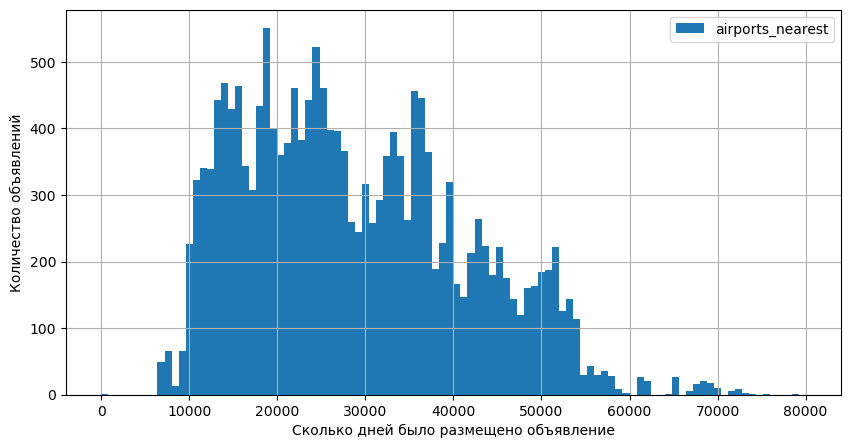

count    17683.000000
mean     28819.940169
std      12660.602245
min          0.000000
25%      18539.000000
50%      26785.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [72]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, range = (0,80000), grid=True, figsize = (10,5))
plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.show()

data['airports_nearest'].describe()

**Вывод:** Аналогично предыдущему графику - пики, это населенные пункты. 
Основная застройка начинается от 10 км после аэропорта. Медиана и среднее это расстояние до севера СПБ. 

In [73]:
data['parks_nearest'].describe()

count    7859.000000
mean      490.205370
std       340.156009
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Вывод:** большая часть выставленных квартир находится в пределах 1 км от парка. 

### День и месяц публикации объявления

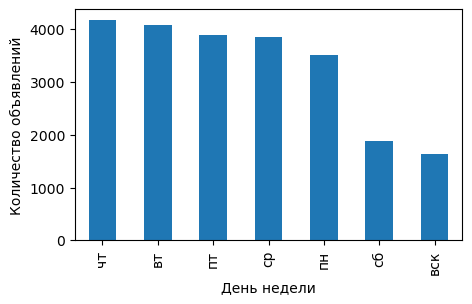

In [74]:
data['weekday_exposition'].value_counts().plot( kind='bar', figsize = (5,3) )
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.show()

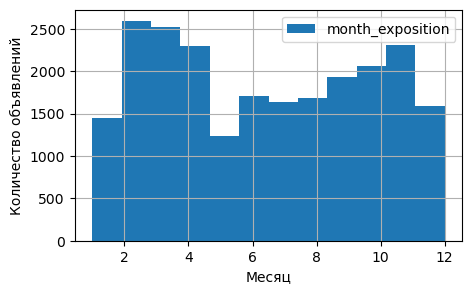

In [75]:
data.plot(y = 'month_exposition', kind = 'hist', bins = 12,  grid=True, figsize = (5,3))
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод:**
- В выходные публикуется меньше объявлений, сотрудники агентсв, которые занимаются размещением объявлений в эти дни отдыхают. 
- Люди чаще продавали квартиры с февраля по апрель и с сентября по ноябрь. Летние отпуска и зимние праздники, скорее всего дают о себе знать. 

### Скорость продажи квартир

In [76]:
data['days_exposition'].describe()

count    23027.000000
mean      1506.267903
std       3360.995112
min          1.000000
25%         45.000000
50%        125.000000
75%        392.000000
max       9999.000000
Name: days_exposition, dtype: float64

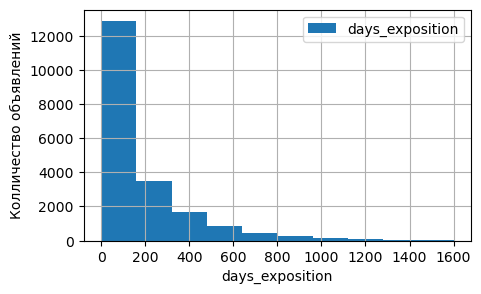

In [77]:
# не забываем про заполненные пропуски, по этому range = (0,1600)
data.plot(y = 'days_exposition', kind = 'hist', bins = 10, grid=True, figsize = (5,3), range = (0,1600))
plt.xlabel('days_exposition')
plt.ylabel('Колличество объявлений')
plt.show()

**Вывод:** 
- Четверть квартир продается менее, чем за 1,5 месяца. 
- Половина квартир уходит за 3 месяца. 
- Есть и весомая часть квартир, которые продаются долго. Учитывая особенности недвижимости СПБ (коммуналки, старый фонд, новостройки без инфраструктуры) такое возможно. 

Пришлось переделать весь пункт 2.7 и перевести days_exposition в int, заполнив пропуски 9999 и внести изменения в графики с помощью range = (0,1600)

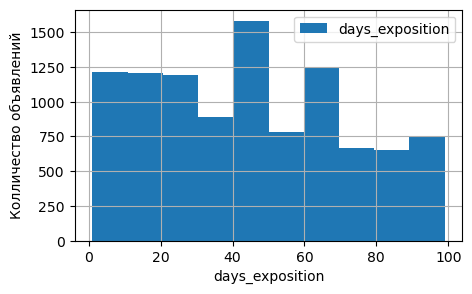

In [78]:
hundred_days = data.query('days_exposition < 100')
hundred_days
hundred_days.plot(y = 'days_exposition', kind = 'hist', bins = 10, grid=True, figsize = (5,3))
plt.xlabel('days_exposition')
plt.ylabel('Колличество объявлений')
plt.show()

**Вывод:** 
Появляются пики на 30м и 60м дне. Это особенность функционирования системы размещения объявлений в сервисе.

## Факторы влияющие на стоимость объекта

### Общая площадь

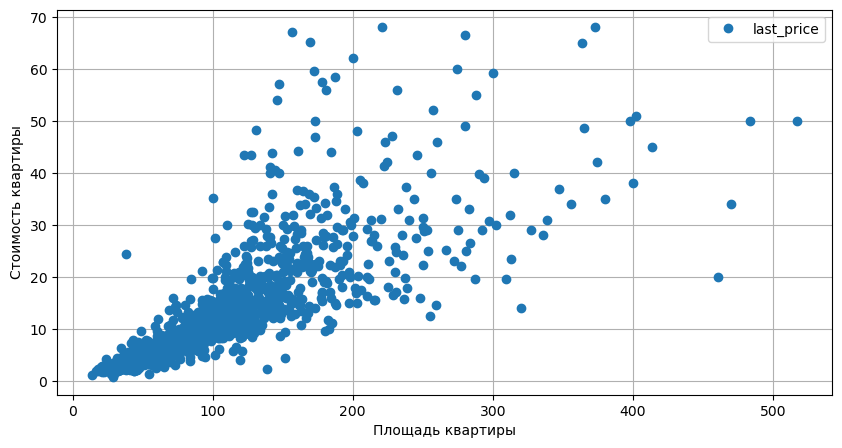

In [79]:
data.pivot_table(index='total_area',values='last_price',aggfunc='mean').plot(style='o', figsize=(10, 5), grid=True)
plt.xlabel('Площадь квартиры')
plt.ylabel('Стоимость квартиры')
plt.show()

In [80]:
# расчет корреляции
print(data['last_price'].corr(data['total_area']))

0.7723004077415665


Взаимосвязь цены и площади хорошо прослеживается для квартир площадью до 200 м2. Далее предложения очень разные.  

**Жилая площадь и площадь кухни**

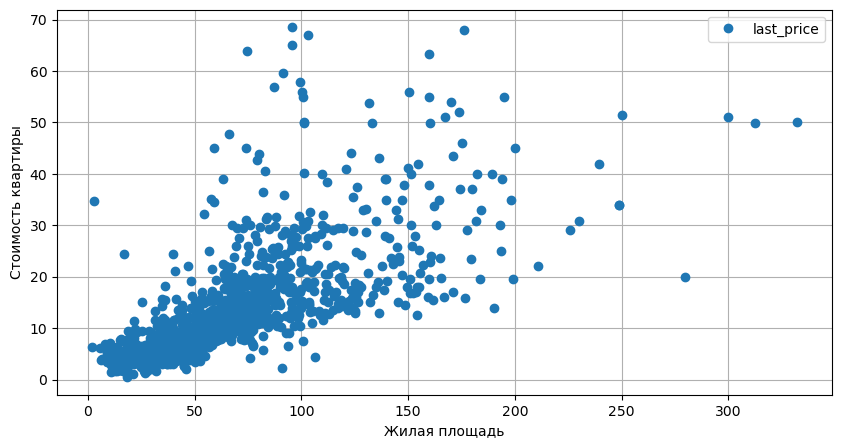

In [81]:
data.pivot_table(index='living_area',values='last_price',aggfunc='mean').plot( style='o', figsize=(10, 5), grid=True)
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость квартиры')
plt.show()

In [82]:
# расчет корреляции
print(data['last_price'].corr(data['living_area']))

0.68377674198773


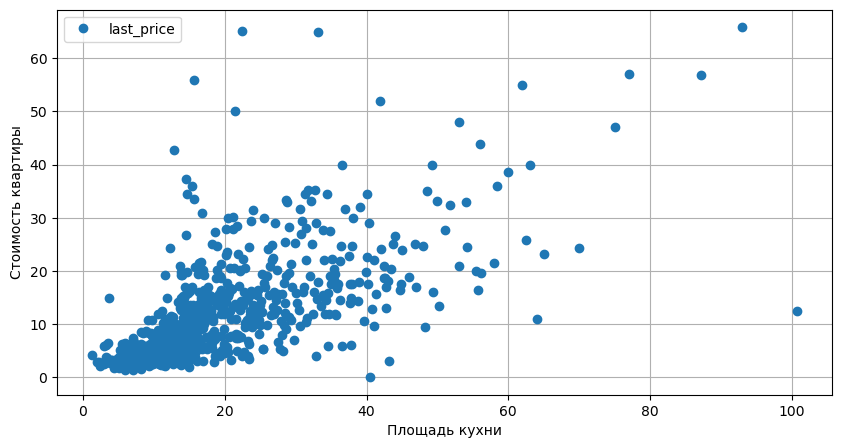

In [83]:
data.pivot_table(index='kitchen_area',values='last_price',aggfunc='mean').plot( style='o', figsize=(10, 5), grid=True)
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость квартиры')
plt.show()

In [84]:
# расчет корреляции
print(data['last_price'].corr(data['kitchen_area']))

0.5908719448935623


Зависимость цены от того сколько метров приходится на жилую и кухонную зоны есть, но она не сильная. 

### Колличество комнат 

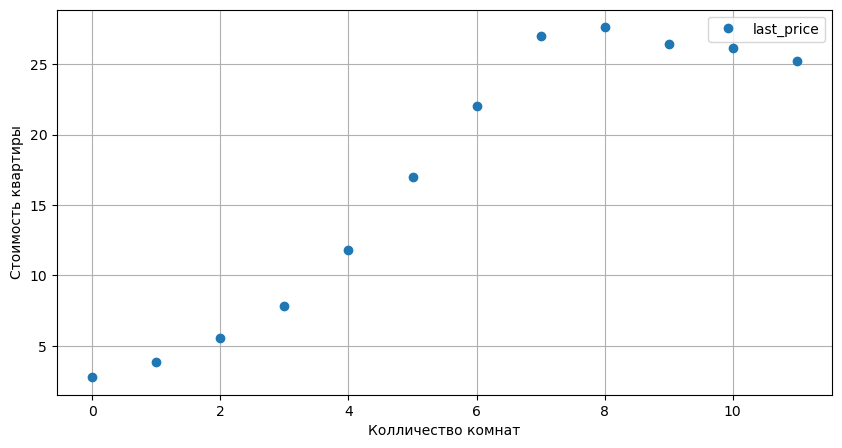

In [85]:
data.pivot_table(index='rooms',values='last_price',aggfunc='mean').plot( style='o', figsize=(10, 5), grid=True)
plt.xlabel('Колличество комнат')
plt.ylabel('Стоимость квартиры')
plt.show()


In [86]:
# расчет корреляции
print(data['last_price'].corr(data['rooms']))

0.49136963337073125


Цена квартиры, опрелделенно зависит от колличества комнат - больше комнат, больше метров, 

### Этажи

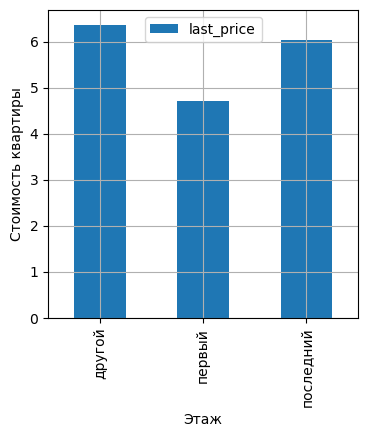

In [87]:
#как и ранее используем столбчатую диаграмму
data.pivot_table(index='floor_cat',values='last_price',aggfunc='mean').plot( kind='bar', figsize=(4, 4), grid=True)
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры')
plt.show()

Квартиры на первом этаже дешевле. А на последнем немного дороже - никто не топает и вид радует. 

### Дата размещения 

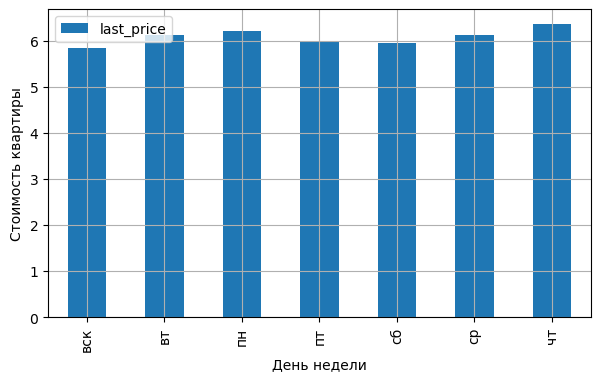

In [88]:
#день недели
data.pivot_table(index='weekday_exposition',values='last_price',aggfunc='mean').plot( kind='bar', figsize=(7, 4), grid=True)
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры')
plt.show()

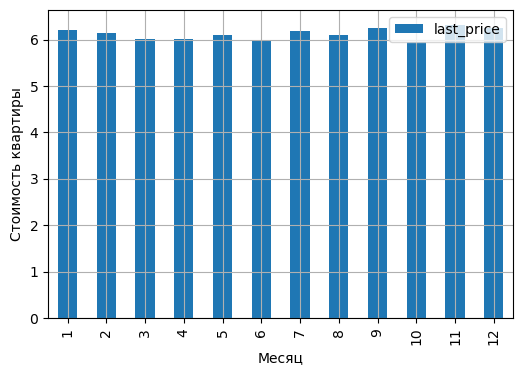

In [89]:
#месяц
data.pivot_table(index='month_exposition',values='last_price',aggfunc='mean').plot( kind='bar', figsize=(6, 4), grid=True)
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры')
plt.show()

В апреле, сентябре и декабре цены чуть выше. 

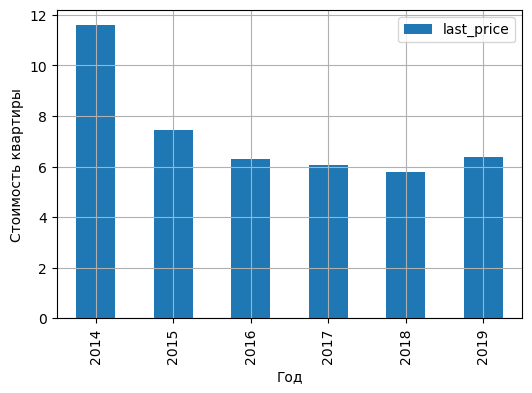

In [90]:
#год
data.pivot_table(index='year_exposition',values='last_price',aggfunc='mean').plot( kind='bar', figsize=(6, 4), grid=True)
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.show()

Кажется, что в 2014 году квартиры были дороже. Попробуем проверить. Добавим в сводную таблицу колличество объявлений за год. 


In [91]:
data.pivot_table(index='year_exposition',values='last_price',aggfunc=['mean','count'])

,mean,count
,last_price,last_price
year_exposition,,
2014,11.604467,134
2015,7.444071,1139
2016,6.286464,2706
2017,6.052700,7988
2018,5.780294,8256
2019,6.378514,2804


В 2014 году в сервисе было размещено всего 135 объявлений, мы не можем однозначно сказать, что все квартиры в том году были дороже, возможно в выборку просто попали с ценой выше среднего. 

## Задания

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 


In [92]:
#создадим сводную таблицу, в ней найдем колличество объявлений и среднюю стоимость для населенного пункта
find_top_10 = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count','mean']).reset_index()

find_top_10.columns=['locality_name', 'total', 'price_per_meter'] # 'total' - Всего объявлений

top_10 = find_top_10.sort_values(by = 'total', ascending = False).head(10) #сделаем выборку топ-10 по колличеству объявлений

top_10.sort_values(by = 'price_per_meter', ascending = False) # отсортируем ее по цене за метр

,locality_name,total,price_per_meter
220,Санкт-Петербург,15307,112791.679391
200,Пушкин,363,102904.793163
104,Кудрово,442,95047.563469
169,Парголово,324,90461.200175
145,Мурино,534,85505.375356
293,Шушары,435,78277.935520
88,Колпино,336,75427.753616
34,Всеволожск,389,68789.499649
42,Гатчина,307,68746.146763
35,Выборг,235,58238.143141


<AxesSubplot:xlabel='locality_name'>

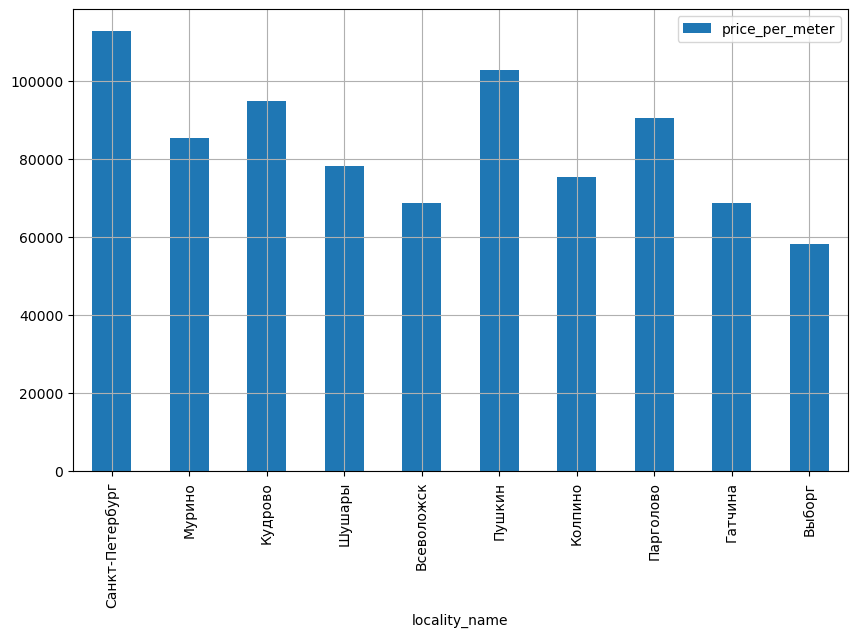

In [93]:
top_10.plot(x='locality_name', y='price_per_meter', kind='bar', grid=True, figsize=(10, 6))

Самая высокая стоимость квадратного метра - Санкт-Петербург (114557.657978 руб.) 
Самая низкая стоимость квадратного метра - Выборг(58238.143141 руб)

### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. 
Опишите, как стоимость объектов зависит от расстояния до центра города.

In [94]:
#отфильтруем таблицу по значанию locality_name = Санкт-Петербург

spb_realty = data.query('locality_name == "Санкт-Петербург"')
spb_realty

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,month_exposition,year_exposition,weekday_exposition,cityCenters_nearest_km,floor_cat
0,20,13.000,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,9999,120370.370370,3,2019,чт,16.028,другой
2,10,5.196,56.00,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,8,2015,чт,13.933,другой
3,0,64.900,159.00,2015-07-24,3,2.60,14,95.0,9,False,False,False,15.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,7,2015,пт,6.800,другой
4,2,10.000,100.00,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,6,2018,вт,8.098,другой
7,5,7.915,71.60,2019-04-18,2,2.75,24,44.3,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,9999,110544.692737,4,2019,чт,11.634,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9.200,101.00,2019-04-01,3,3.05,15,63.0,12,False,False,False,15.00,0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23,91089.108911,4,2019,пн,14.428,другой
23689,13,3.550,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29,100566.572238,2,2018,ср,16.081,другой
23690,3,5.500,52.00,2018-07-19,2,2.55,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15,105769.230769,7,2018,чт,6.263,другой
23691,11,9.470,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519,129903.978052,10,2016,чт,4.489,другой


In [95]:
#построим сводную таблицу, где для каждого расстояния от центра найдем стреднюю стоимотсь квадратного метра
# используем reset_index(), чтобы 
spb_realty_pivot = spb_realty.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_meter', aggfunc = 'mean').reset_index()

spb_realty_pivot  

,cityCenters_nearest_km,price_per_meter
0,0.181,195591.194969
1,0.208,172619.047619
2,0.215,109900.000000
3,0.287,88796.296296
4,0.291,101321.585903
...,...,...
6223,28.644,85191.334598
6224,28.806,79890.310786
6225,29.263,56526.806527
6226,29.343,73943.661972


In [96]:
spb_realty_pivot = spb_realty_pivot.sort_values(by='cityCenters_nearest_km', ascending = True)
spb_realty_pivot

,cityCenters_nearest_km,price_per_meter
0,0.181,195591.194969
1,0.208,172619.047619
2,0.215,109900.000000
3,0.287,88796.296296
4,0.291,101321.585903
...,...,...
6223,28.644,85191.334598
6224,28.806,79890.310786
6225,29.263,56526.806527
6226,29.343,73943.661972


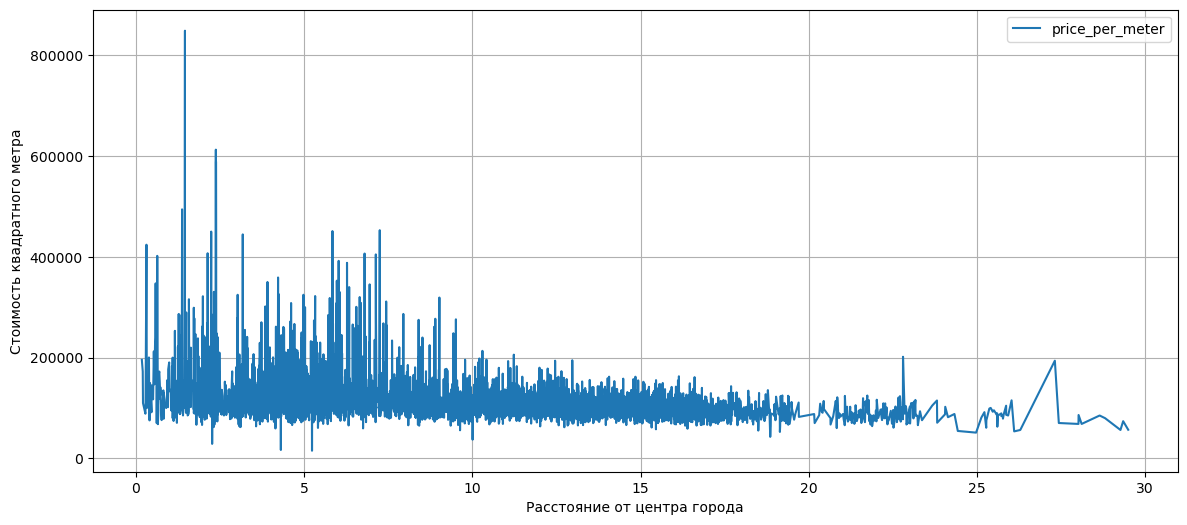

In [97]:
spb_realty_pivot.plot( 
    x='cityCenters_nearest_km',
    y='price_per_meter',
    style='-',
    grid=True,
    figsize=(14, 6),
) 

plt.xlabel('Расстояние от центра города')
plt.ylabel('Стоимость квадратного метра')
plt.show()

Чем дальше от центра, тем дешевле. Но есть и всплески, это элитные районы в районе Московского проспекта. Также есть всплеск в конце, скорее всего это курортный район. 

## Общий вывод

В ходе предобработки мы удалили 2,8 % данных, которые сочли не пригодными для анализа. 

Были обработаны пропуски в некоторых столбцах:
 - Удалили квартиры с количеством комнат больше 12, так как для них не отслеживается увеличение площади.
- Нулевые значения оставили только для открытой планировки, остальные прировняли к однушкам. 
- Пропуске в столбце «высота потолков» заполнили медианой в зависимости от этажности дома. Убрали аномально низкие и высокие потолки.
- living_area и в kitchen_area мы заполнили медианными значениями в зависимости от площади квартиры. Так как квартиры преимущественно типовые, то такое допущение вполне возможно. 
- Переработали список населенных пунктов, убрав оттуда типы населенных пунктов. 
- Пропуски в столбце с балконами заполнили нулями, предположив, что в таком случае балконов нет. 
- Аналогично поступили с апартаментами.

В дальнейшем рекомендуется сделать обязательными те поля, которые являются важными для анализа работы сервиса. Возможно стоит добавить небольшие подсказки как правильно определить жилую площадь, площадь кухни количество комнат для разного типа квартир и разной планировки.  Для населенных пунктов рекомендуется сделать выбор из списка. 



**Изучив данные можно сделать несколько выводов**
1.  На рынке недвижимости СПБ больше всего представлены однокомнатные квартиры, им немного уступают двухкомнатные.
2.  Широко представлены типовые квартиры – двушки с кухней 9 метров. 
3.  Средняя высота потолков 2,7. Но 25% квартир с потолками выше 3 метров – это особенность старого фонда СПБ. 
4.  На стоимость квартиры влияет: площадь и район (удаленность от центра).  Последний этаж чуть дороже, нет соседей с верху и вид лучше; первые этажи на которых меньше света и холоднее – дешевле. 
5.  В исследуемый период не были распространены апартаменты и открытая планировка. 
6.  Квартиры в СПБ дороже, чем в области.
7. Среднее время продажи квартиры - 3 месяца. Половина квартир уходит за 3 месяца.
8. Больше всего на рынке представлено квартир стоимостью 3 - 5 мл